## Bolus Glucose Control in Type 1 Diabetes Using Deep Reinforcement Learning
Raphael Joost, 18-???-??? & Yanis Schärer, 18-114-058

In [1]:
from Agent import DDPGAgent
from utils import make_env

C:\Users\yanis\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Create environment

In [2]:
average_patient = make_env('simglucose_average', 'average_adolescent')

State space:
 Dict('CGM': Box(0.0, 10000.0, (6,), float32), 'CHO': Box(0.0, 10000.0, (6,), float32), 'insulin': Box(0.0, 10000.0, (6,), float32))
Action space:
 Box(0.2, 2.0, (3,), float32)


Initialize DDPG agent

In [3]:
agent = DDPGAgent(average_patient)

Train agent on average patient (This is done on UBELIX). The state of the actor and critic networks are saved in the folder 'agent_state'.
```python
general_critic_loss = agent.general_training()
````

Load trained agent

In [ ]:
# agent.load_agent('agent_state')

Evaluate policy on average patient

c:\Users\yanis\anaconda3\envs\simgl\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[ 1.70789083  0.01234833 -0.        ]
[ 2.02161531 -1.15801065 -0.        ]
[ 2.78231338 -0.48250105 -0.        ]
Episode finished after 417 timesteps (patient died).
Episode finished.


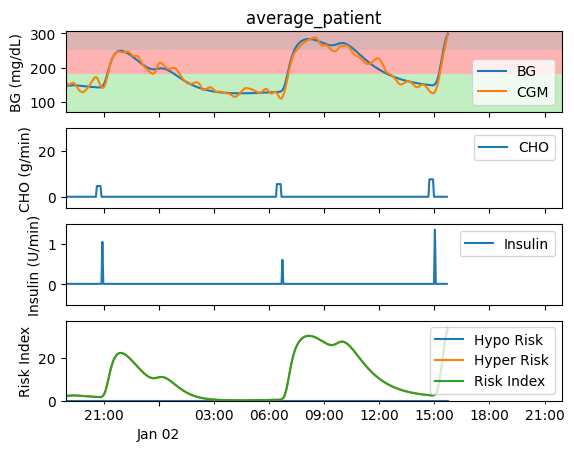

In [4]:
# Load and plot the critic loss
metrics = agent.evaluate_policy(render=True)
# Do something with metrics

Fine-tune on a specific patient (e.g. 'adolescent#001')

In [7]:
individual_patient = make_env('simglucose_adolescent001', 'adolescent#001')

State space:
 Dict('CGM': Box(0.0, 10000.0, (6,), float32), 'CHO': Box(0.0, 10000.0, (6,), float32), 'insulin': Box(0.0, 10000.0, (6,), float32))
Action space:
 Box(0.2, 2.0, (3,), float32)


Personalized training is done on UBELIX, the state of the actor and critic networks are loaded below.
```python
personalized_critic_loss = agent.personalized_training(individual_patient)
```

c:\Users\yanis\anaconda3\envs\simgl\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[2.4570494  1.63401099 0.        ]
[ 1.75675949 -0.93145616 -0.        ]
[ 2.91523645 -2.35892276 -0.        ]
[ 2.50347373  1.34245328 -0.        ]
[ 1.89559258 -1.66805627 -0.        ]
[ 2.50356995  0.41158279 -0.        ]
Episode finished.


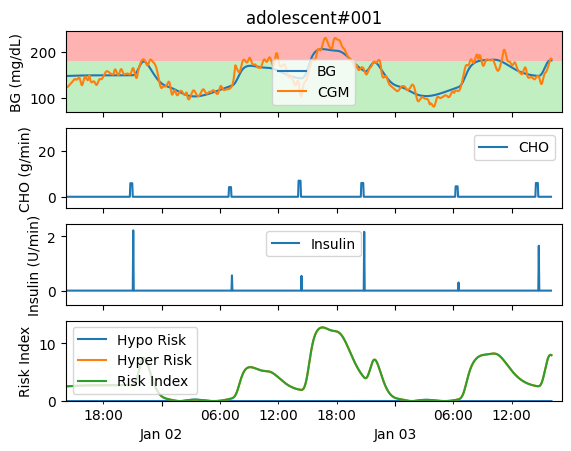

In [9]:
# agent.load_agent('agent_state_finetuned')
# Load and plot the critic loss
metrics = agent.evaluate_policy(individual_patient, render=True)
# Do something with the metrics